In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\PC\Downloads\life_expectancy.csv")
df.head()


,Country,female,both,male
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


In [4]:
# Step 2: Select useful columns
X = df[['female','male','both']]
X.head()


,female,male,both
0,57.19,53.36,55.24
1,54.94,54.33,54.64
2,60.75,54.76,57.74
3,60.44,55.03,57.80
4,59.56,55.51,57.67


In [5]:
# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

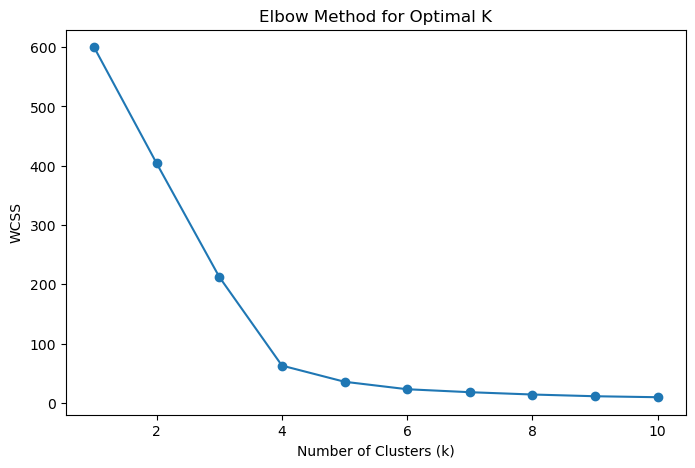

In [6]:
# Step 4: Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Step 5: Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Step 6: Assign meaningful names for 4 clusters
cluster_names = {
    0: 'Very Low Life Expectancy',
    1: 'Low Life Expectancy',
    2: 'Medium Life Expectancy',
    3: 'High Life Expectancy'
}


In [9]:
# Step 7: Colors for 4 clusters
colors = ['purple', 'blue', 'green', 'orange']


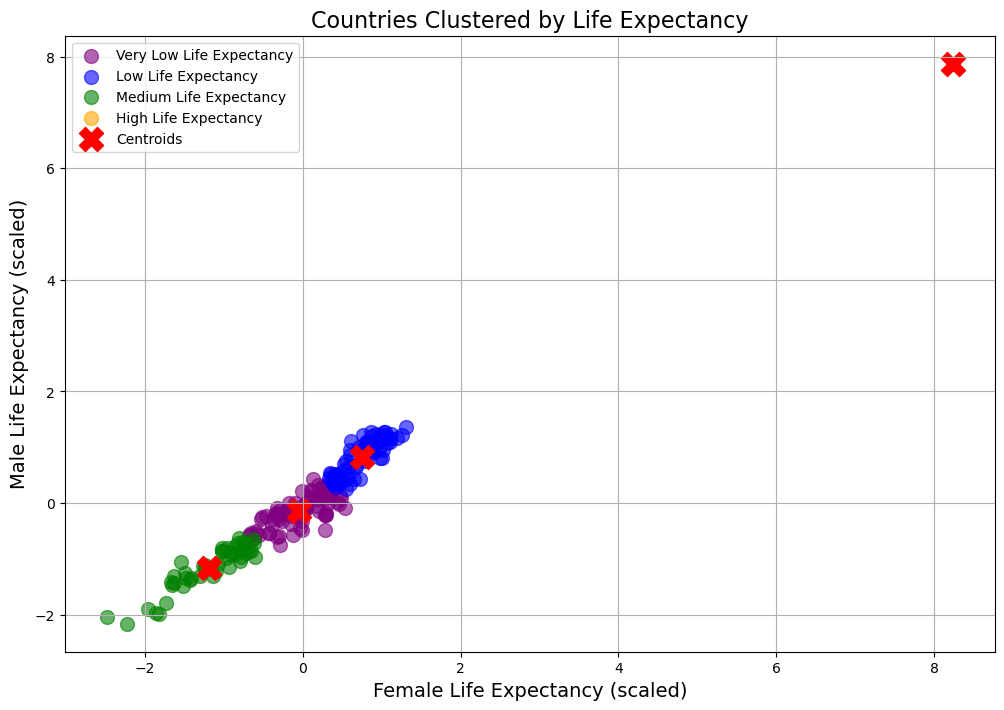

In [10]:
# Step 8: Visualization
plt.figure(figsize=(12,8))

for cluster in range(4):
    cluster_points = X_scaled[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=100, alpha=0.6, color=colors[cluster],
                label=cluster_names[cluster])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=300, marker='X', label='Centroids')

plt.title('Countries Clustered by Life Expectancy', fontsize=16)
plt.xlabel('Female Life Expectancy (scaled)', fontsize=14)
plt.ylabel('Male Life Expectancy (scaled)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
